# FIT5196 Assessment 2 Task1
#### Student Name: William Clark
#### Student ID: 31993303

Date: 23/11/2020

Version: 1.0

Environment: Python 3 and Jupyter notebook

Libraries used: please include the main libraries you used in your assignment here, e.g.,:
* pandas 
* re 
* numpy
* seaborn
* matplotlib.pyplot


<span style="color: red"> Note that this is a sample notebook only. You will need to fill in the proper markdown and code blocks. You might also want to make necessary changes to the structure to meet your own needs. It is important to make sure the logic of how you finish the assessment is clearly shown in this notebook! </span>

## Import libraries 

In [1]:
# Code to import libraries as you need in this assessment, e.g.,
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt

## Task 1. Auditing and cleansing the loaded data

Here, you should write your own code to audit data, identify data problems and to fix them. Also, record the found errors as required

<span style="color: red"> You might have complex notebook structure in this section, please feel free to create your own notebook structure. </span>

In [2]:
# Code to audit data
with open("dataset1_with_error.csv", 'r') as f:
    for line in f.readlines()[:10]:
        print (line)

Id,Title,Location,Company,ContractType,ContractTime,Category,Salary,OpenDate,CloseDate,Source

12612628,Engineering Systems Analyst,Dorking,Gregory Martin International,N/A,permanent,Engineering Jobs,25000,20130708T120000,20130906T120000,cv-library.co.uk

12612830,Stress Engineer Glasgow,Glasgow,Gregory Martin International,N/A,permanent,Engineering Jobs,30000,20120130T000000,20120330T000000,cv-library.co.uk

12612844,Modelling and simulation analyst,Hampshire,Gregory Martin International,N/A,permanent,Engineering Jobs,30000,20121221T150000,20130120T150000,cv-library.co.uk

12613049,Engineering Systems Analyst / Mathematical Modeller,Surrey,Gregory Martin International,N/A,permanent,Engineering Jobs,27500,20131208T150000,20140206T150000,cv-library.co.uk

12613647,"Pioneer, Miser Engineering Systems Analyst",Surrey,Gregory Martin International,N/A,permanent,Engineering Jobs,25000,20130302T120000,20130501T120000,cv-library.co.uk

19047429,Trainee Mortgage Advisor  East Midlands,East Midl

In [3]:
with open("dataset1_with_error.csv", 'r') as f:
    for line in f.readlines()[-10:]:
        print (line)

72702933,IT Infrastructure Specialist (Mlnlycke Health Care)  Manchester,UK,Molnlycke,N/A,permanent,Healthcare & Nursing Jobs,28500,20120511T000000,20120610T000000,emedcareers.com

72702956,Pharmaceutical  Analytical Chemist Jobs in Northern Ireland,Northern Ireland,Flame Pharma,N/A,permanent,Healthcare & Nursing Jobs,N/A,20121130T150000,20121230T150000,emedcareers.com

72702963,Medical Sales Representative  South East Essex,UK,The Vacancy Management Company,N/A,contract,Healthcare & Nursing Jobs,22500,20120504T120000,20120603T120000,emedcareers.com

72703193,SENIOR PROJECT MANAGER  EVENT & EXHIBITION AGENCY,Hertfordshire,Live Recruitment,full_time,permanent,"PR, Advertising & Marketing Jobs",32500,20121120T150000,20130218T150000,eventjobsearch.co.uk

72705197,Curriculum Leader  Mathematics,Wrexham, , ,permanent,Teaching Jobs,5006,20130514T120000,20130713T120000,hays.co.uk

72705203,TEACHER OF BUSINESS STUDIES AND LAW,Salisbury, , ,contract,Teaching Jobs,22800,20120123T120000,20120206T

In [4]:
csvdf_1 = pd.read_table("dataset1_with_error.csv", sep=",")
type(csvdf_1)

pandas.core.frame.DataFrame

In [5]:
csvdf_1.head(5)

,Id,Title,Location,Company,ContractType,ContractTime,Category,Salary,OpenDate,CloseDate,Source
0,12612628,Engineering Systems Analyst,Dorking,Gregory Martin International,NaN,permanent,Engineering Jobs,25000,20130708T120000,20130906T120000,cv-library.co.uk
1,12612830,Stress Engineer Glasgow,Glasgow,Gregory Martin International,NaN,permanent,Engineering Jobs,30000,20120130T000000,20120330T000000,cv-library.co.uk
2,12612844,Modelling and simulation analyst,Hampshire,Gregory Martin International,NaN,permanent,Engineering Jobs,30000,20121221T150000,20130120T150000,cv-library.co.uk
3,12613049,Engineering Systems Analyst / Mathematical Mod...,Surrey,Gregory Martin International,NaN,permanent,Engineering Jobs,27500,20131208T150000,20140206T150000,cv-library.co.uk
4,12613647,"Pioneer, Miser Engineering Systems Analyst",Surrey,Gregory Martin International,NaN,permanent,Engineering Jobs,25000,20130302T120000,20130501T120000,cv-library.co.uk


In [6]:
csvdf_1.tail(5)

,Id,Title,Location,Company,ContractType,ContractTime,Category,Salary,OpenDate,CloseDate,Source
55164,72705203,TEACHER OF BUSINESS STUDIES AND LAW,Salisbury,,,contract,Teaching Jobs,22800,20120123T120000,20120206T120000,hays.co.uk
55165,72705205,Pensions Administrators (Temporary/Contract),UK,Abenefit2u,NaN,contract,Accounting & Finance Jobs,24000,20130801T150000,20130831T150000,cv-library.co.uk
55166,72705221,Senior Financial Advisor,London,Fram Executive Search.,-,permanent,Accounting & Finance Jobs,40000,20130126T000000,20130225T000000,ifaonlinejobs.co.uk
55167,72705240,Barclays Future Leaders Development Programmes,Hackney,Barclays,-,-,IT Jobs,36000,20121223T150000,20130221T150000,grb.uk.com
55168,72705244,Quality Assurance Environmental Manager Nottin...,Nottingham,Stephen James Consulting,NaN,permanent,Healthcare & Nursing Jobs,35000.0,20120110T150000,20120409T150000,tntjobs.co.uk


In [7]:
jobs = csvdf_1
jobs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55169 entries, 0 to 55168
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Id            55169 non-null  int64 
 1   Title         55169 non-null  object
 2   Location      55169 non-null  object
 3   Company       51320 non-null  object
 4   ContractType  33493 non-null  object
 5   ContractTime  47047 non-null  object
 6   Category      55169 non-null  object
 7   Salary        53584 non-null  object
 8   OpenDate      55169 non-null  object
 9   CloseDate     55169 non-null  object
 10  Source        55169 non-null  object
dtypes: int64(1), object(10)
memory usage: 4.6+ MB


In [8]:
jobs.describe(include=['O'])

,Title,Location,Company,ContractType,ContractTime,Category,Salary,OpenDate,CloseDate,Source
count,55169,55169,51320,33493,47047,55169,53584,55169,55169,55169
unique,55166,489,9064,4,4,8,3757,2194,2418,106
top,Pensions Administrators (Temporary/Contract),UK,,,permanent,IT Jobs,35000,20120415T150000,20131208T000000,totaljobs.com
freq,2,8397,1133,14902,33637,14344,1865,45,45,10102


In [9]:
jobs.Title.value_counts()
#we identify below that there are several instances of location, contract time, and ID.

Pensions Administrators (Temporary/Contract)                          2
Quality Assurance Environmental Manager Nottingham, East Midlands     2
Senior Financial Advisor                                              2
Product Owner (Agile)                                                 1
Software Product Manager / Roadmap / Gloucester  ****K                1
                                                                     ..
Technical Pension Specialist                                          1
Registered Nurse RMN/RNLD  Bank  Newcastle upon Tyne                  1
Dyslexia (SpLD) Learning Tutor                                        1
Software Engineer  Java  Tech startup  Corby                          1
Deputy Manager Sheffield, Fab Brand                                   1
Name: Title, Length: 55166, dtype: int64

In [10]:
jobs.drop_duplicates(subset=['Title', 'Company', 'Location', 'Category'], keep=False)
#These duplicates have no use in the data, as it is unlikely that any combinations of other variables with the 
#above four columns being held constant will be accurate, or have any meaning to the use to a regression

,Id,Title,Location,Company,ContractType,ContractTime,Category,Salary,OpenDate,CloseDate,Source
0,12612628,Engineering Systems Analyst,Dorking,Gregory Martin International,NaN,permanent,Engineering Jobs,25000,20130708T120000,20130906T120000,cv-library.co.uk
1,12612830,Stress Engineer Glasgow,Glasgow,Gregory Martin International,NaN,permanent,Engineering Jobs,30000,20120130T000000,20120330T000000,cv-library.co.uk
2,12612844,Modelling and simulation analyst,Hampshire,Gregory Martin International,NaN,permanent,Engineering Jobs,30000,20121221T150000,20130120T150000,cv-library.co.uk
3,12613049,Engineering Systems Analyst / Mathematical Mod...,Surrey,Gregory Martin International,NaN,permanent,Engineering Jobs,27500,20131208T150000,20140206T150000,cv-library.co.uk
4,12613647,"Pioneer, Miser Engineering Systems Analyst",Surrey,Gregory Martin International,NaN,permanent,Engineering Jobs,25000,20130302T120000,20130501T120000,cv-library.co.uk
...,...,...,...,...,...,...,...,...,...,...,...
55162,72703193,SENIOR PROJECT MANAGER EVENT & EXHIBITION AGENCY,Hertfordshire,Live Recruitment,full_time,permanent,"PR, Advertising & Marketing Jobs",32500,20121120T150000,20130218T150000,eventjobsearch.co.uk
55163,72705197,Curriculum Leader Mathematics,Wrexham,,,permanent,Teaching Jobs,5006,20130514T120000,20130713T120000,hays.co.uk
55164,72705203,TEACHER OF BUSINESS STUDIES AND LAW,Salisbury,,,contract,Teaching Jobs,22800,20120123T120000,20120206T120000,hays.co.uk
55166,72705221,Senior Financial Advisor,London,Fram Executive Search.,-,permanent,Accounting & Finance Jobs,40000,20130126T000000,20130225T000000,ifaonlinejobs.co.uk


In [11]:
jobs[jobs['Title'].str.contains('\*\*\*\*')]
#there appears to be no use for this character in this column, I will remove it

,Id,Title,Location,Company,ContractType,ContractTime,Category,Salary,OpenDate,CloseDate,Source
17,25337172,Pastry Chef for **** red star **** rosette hot...,North East England,Clear Selection,-,-,Hospitality & Catering Jobs,-,20121214T120000,20121228T120000,caterer.com
18,25452606,CHEF DE PARTIE POSITION IN **** ROSETTE HOTEL ...,North Yorkshire,Clear Selection,-,-,Hospitality & Catering Jobs,16000,20120709T150000,20120723T150000,caterer.com
19,25452680,"Senior Sous Chef for **** rosette kitchen, up ...",North East England,Clear Selection,-,-,Hospitality & Catering Jobs,26000,20131031T000000,20131114T000000,caterer.com
20,25556432,"General Manager Funky, Cool Restaurant Concep...",East Sheen,Bee Recruitment London Ltd,-,-,Hospitality & Catering Jobs,31500,20130610T120000,20130809T120000,caterer.com
26,27739522,Welwyn Chef de Partie does it get any better t...,UK,Clear Selection,-,-,Hospitality & Catering Jobs,18000,20120519T120000,20120718T120000,caterer.com
...,...,...,...,...,...,...,...,...,...,...,...
55126,72697105,Chartered Electrical Engineer (CDE****),Wales,Dwr Cymru Cyfyngedig,,permanent,Engineering Jobs,37804,20130404T000000,20130504T000000,justengineers.net
55127,72697129,Quality Engineer **** Electronics manufactur...,Dorset,G2 Recruitment Solutions Limited,,permanent,Engineering Jobs,37500,20130121T000000,20130220T000000,justengineers.net
55128,72697130,Control Systems Engineers **** ****k Car Over...,West Midlands,Automation Experts Ltd,,permanent,Engineering Jobs,37500,20120513T000000,20120712T000000,justengineers.net
55132,72697203,Civil Pipeline Engineer (CDE****) (R****),UK,Dwr Cymru Cyfyngedig,,permanent,Engineering Jobs,30644,20120408T120000,20120607T120000,justengineers.net


In [12]:
jobs['Title'] = jobs['Title'].replace({'\*':''}, regex=True)
jobs[jobs['Title'].str.match('\*')]
# removed useless character from title column

,Id,Title,Location,Company,ContractType,ContractTime,Category,Salary,OpenDate,CloseDate,Source


In [13]:
jobs['Salary'].fillna('', inplace=True)

In [14]:
jobs.loc[(jobs["Salary"].str.contains('\D+\d+'))]
#uh-oh, lots of characters other than digits in salary column

,Id,Title,Location,Company,ContractType,ContractTime,Category,Salary,OpenDate,CloseDate,Source
614,46634425,Charge Nurse RMN/RNLD Kent,Kent,NaN,full_time,NaN,Healthcare & Nursing Jobs,30500 - 35500,20131106T150000,20131206T150000,careworx.co.uk
852,46852076,RMN/RGN Nurse Stoke,UK,NaN,NaN,NaN,Healthcare & Nursing Jobs,26131 to 28131,20120715T000000,20120913T000000,careworx.co.uk
1177,53007691,Paediatric Home IV Nurse,London,NaN,NaN,NaN,Healthcare & Nursing Jobs,27750 To 28250,20131117T000000,20140116T000000,careworx.co.uk
1286,55278077,Nursing Home Manager Letchworth,Letchworth Garden City,NaN,NaN,NaN,Healthcare & Nursing Jobs,33000 To 38000,20120925T000000,20121124T000000,careworx.co.uk
1674,57111514,Clinic Nurse Sexual Health,Newcastle Upon Tyne,NaN,NaN,NaN,Healthcare & Nursing Jobs,28969 - 30969,20120325T120000,20120408T120000,careworx.co.uk
...,...,...,...,...,...,...,...,...,...,...,...
55054,72693862,Band 6 Dietitian London Part Time,London,The Placement Group,NaN,NaN,Healthcare & Nursing Jobs,43200.0,20130324T150000,20130423T150000,contractjobs.com
55055,72693889,Band 6 Adult Speech and Language Therapist req...,South West England,Castlerock Recruitment Group,NaN,NaN,Healthcare & Nursing Jobs,47040.0,20130523T120000,20130622T120000,contractjobs.com
55057,72693998,Locum A&E Physiotherapist South Coast,South West England,The Placement Group,NaN,NaN,Healthcare & Nursing Jobs,48000.0,20120708T000000,20120807T000000,contractjobs.com
55058,72694003,Locum Musculoskeletal O/P Physiotherapist Berk...,South East England,The Placement Group,NaN,NaN,Healthcare & Nursing Jobs,6120.0,20120207T000000,20120407T000000,contractjobs.com


In [15]:
jobs['Salary'] = jobs['Salary'].replace({'\D+\d+':''}, regex=True)
phjobs = jobs.loc[(jobs["Salary"].str.contains('(hour|h)'))]
phjobs
#I suspected there may be pay expressed as an hourly, or daily pay rate. When no hits came for daily pay, I removed the search for daily pay.
# I have likewise deleted searches for data errors which didn't exist in this data set to improve conciseness of an already lengthy document

/Users/jilly/opt/anaconda3/lib/python3.8/site-packages/pandas/core/strings.py:1954: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


,Id,Title,Location,Company,ContractType,ContractTime,Category,Salary,OpenDate,CloseDate,Source
31860,69747171,Marketing Apprenticeship Assessor,Fareham,R21 Media,part_time,NaN,Teaching Jobs,9 per hour,20131216T000000,20131230T000000,cv-library.co.uk
36020,70263505,RGNs/RMNs wanted URGENTLY Ilford,Ilford,Prestige Nursing,part_time,NaN,Healthcare & Nursing Jobs,17 per hour,20130209T000000,20130223T000000,staffnurse.com
37752,70623986,Part Time Team Leader,Derby,Hiredonline,part_time,,Sales Jobs,13 per hour,20130928T000000,20131028T000000,totaljobs.com
38357,70716512,Lecturer ESOL,Blackpool,,part_time,,Teaching Jobs,12 p/h,20130119T000000,20130320T000000,jobstoday.co.uk
41767,71294755,"Supporting, Teaching Learning Assessor",West Yorkshire,Protocol National,part_time,NaN,Teaching Jobs,11 p/h,20120225T000000,20120425T000000,cv-library.co.uk


In [16]:
phjobs['Salary'] = phjobs['Salary'].replace({'\D+':''}, regex = True)
#remove non-digits in hourly pay data

<ipython-input-16-7fb17fd62aa1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  phjobs['Salary'] = phjobs['Salary'].replace({'\D+':''}, regex = True)


In [17]:
phjobs['Salary'] = pd.to_numeric(phjobs['Salary'])
phjobsfinal = phjobs
phjobsfinal['Salary'] = phjobs['Salary'] * 20 * 52
phjobsfinal['Salary'] = phjobsfinal['Salary'].astype(str)
#create yearly figure for part-time salary expressed as per-hour pay. Weekly hours assumed to be 20

<ipython-input-17-c42a4a36a12f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  phjobs['Salary'] = pd.to_numeric(phjobs['Salary'])
<ipython-input-17-c42a4a36a12f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  phjobsfinal['Salary'] = phjobs['Salary'] * 20 * 52
<ipython-input-17-c42a4a36a12f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/

In [18]:
jobs = pd.concat([jobs, phjobsfinal])

In [19]:
jobs = jobs[~jobs["Salary"].str.contains('(hour|h)')]

/Users/jilly/opt/anaconda3/lib/python3.8/site-packages/pandas/core/strings.py:1954: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


In [20]:
jobs.loc[jobs["Salary"].str.contains('\D')]
jobs['Salary'] = jobs['Salary'].replace({'\D+':''}, regex=True)
#finally remove all non-digits from Salary, hooray!

In [21]:
jobs.loc[(jobs["Title"].str.contains('\spart(\s|\W)?time')) & (jobs["Title"].str.contains('\sor\s'))]
jobs.loc[(jobs["Title"].str.contains('\spart(\s|\W)?time')) & (jobs["Title"].str.contains('\sor\s')), "ContractType"] = 'flexible'
jobs.loc[(jobs["Title"].str.contains('\spart(\s|\W)?time')) & (jobs["Title"].str.contains('\sor\s'))]

,Id,Title,Location,Company,ContractType,ContractTime,Category,Salary,OpenDate,CloseDate,Source
20001,68696686,Tax Advisor full or part time,Hinckley,Alexander Kaye Recruitment Ltd,flexible,permanent,Accounting & Finance Jobs,36000,20130921T000000,20131220T000000,totaljobs.com
23638,69005130,Nursery Nurse (full time or part time),Guildford,People Personnel,flexible,permanent,Teaching Jobs,13750,20130816T120000,20130915T120000,cv-library.co.uk
27649,69216512,Business Development Work from Home part time ...,Middlesbrough,TTT Group,flexible,permanent,Sales Jobs,34000,20130406T150000,20130506T150000,fish4.co.uk
36643,70435934,OPTOMETRIST/ MANAGER BRIGHTON K K full or p...,Brighton,Match2Match,flexible,NaN,Healthcare & Nursing Jobs,45000,20121110T000000,20121210T000000,jobs.opticianonline.net


In [22]:
jobs.loc[(jobs["Title"].str.contains('\spart(\s|\W)?time')) & (jobs["ContractType"]!= 'flexible'), 'ContractType']='part_time'
jobs.loc[(jobs["Title"].str.contains('\spart(\s|\W)?time')) & (jobs["ContractType"]!= 'flexible')].head(4)

/Users/jilly/opt/anaconda3/lib/python3.8/site-packages/pandas/core/strings.py:1954: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


,Id,Title,Location,Company,ContractType,ContractTime,Category,Salary,OpenDate,CloseDate,Source
2395,62007591,"Care Worker full time, part time, evening, wee...",Bournemouth,Bluebird Care Bournemouth,part_time,NaN,Healthcare & Nursing Jobs,,20120610T000000,20120809T000000,MyUkJobs
7220,67057552,"Early Years Teacher (temp, part time) P",Scotland,KELLY STREET CHILDRENS CENTRE,part_time,contract,Teaching Jobs,29958,20120308T150000,20120507T150000,jobs.guardian.co.uk
9686,67787279,Sales Advisor part time,Cardiff,,part_time,contract,Sales Jobs,12500,20130702T150000,20130831T150000,simplysalesjobs.co.uk
10809,68060862,Business Development Work part time and earn f...,UK,The Freedom Group,part_time,permanent,Sales Jobs,30000,20131101T120000,20131231T120000,totaljobs.com


In [23]:
jobs['Company'] = jobs['Company'].replace({'':np.nan}, regex=False)

In [24]:
jobs[(jobs['Title'].str.contains('(Contract)|(Temporary)|(Temp)')) & (jobs['ContractTime']!='contract')].head(4)
#fix inconsistency in contract being in job title and appearing in contract time column

/Users/jilly/opt/anaconda3/lib/python3.8/site-packages/pandas/core/strings.py:1954: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


,Id,Title,Location,Company,ContractType,ContractTime,Category,Salary,OpenDate,CloseDate,Source
94,44436407,Hospital Contracts Manager,Cumbria,MatchBox Recruiting Ltd,NaN,permanent,Sales Jobs,47500,20131101T000000,20131201T000000,cv-library.co.uk
600,46634346,"Registered Care Managers, Fixed Term Contracts",Somerset,NaN,NaN,NaN,Healthcare & Nursing Jobs,28500,20130122T150000,20130323T150000,careworx.co.uk
1262,54681541,Service Contracts Manager / Service and Mainte...,Manchester,XL Recruitment,NaN,permanent,Engineering Jobs,40000,20130513T000000,20130712T000000,cv-library.co.uk
1392,55408951,Contracts Administrator / Support SAP,Bedfordshire,Executive Recruitment Services,full_time,permanent,IT Jobs,21000,20121013T150000,20121112T150000,planetrecruit.com
1486,55414692,Commercial Contracts Manager,Cornwall,JOBG8,full_time,permanent,Sales Jobs,44999,20120414T000000,20120713T000000,hotrecruit.com
...,...,...,...,...,...,...,...,...,...,...,...
54943,72690196,Installation / Contract Managers,UK,OnlineMediaExperts ltd,NaN,permanent,Engineering Jobs,32500,20131222T150000,20140220T150000,jobsite.co.uk
55062,72694104,PHP Contract role London,The City,SEC Recruitment,NaN,NaN,IT Jobs,90000,20130710T150000,20130724T150000,gojobsearch.co.uk
55080,72694287,HomeBased Contract SAS Programmer,Berkshire,SEC Recruitment,NaN,NaN,IT Jobs,86400,20130807T120000,20130821T120000,gojobsearch.co.uk
55081,72694301,Accounts Assistant with SAP 3 Month Contract,Liverpool,Vitae Financial Recruitment,NaN,NaN,Accounting & Finance Jobs,23040,20130923T150000,20131023T150000,gojobsearch.co.uk


In [25]:
jobs.loc[(jobs['Title'].str.contains('(Contract)|(Temporary)|(Temp)')) & (jobs['ContractTime']!='contract'),'ContractType']='contract'

/Users/jilly/opt/anaconda3/lib/python3.8/site-packages/pandas/core/strings.py:1954: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


In [26]:
jobs[(jobs['Title'].str.contains('(perm)|(Perm)|(Permanent)')) & (jobs['ContractTime']!='permanent')].head(5)

,Id,Title,Location,Company,ContractType,ContractTime,Category,Salary,OpenDate,CloseDate,Source
659,46635017,Senior Practitioner Job Colchester Permanency,Colchester,NaN,full_time,NaN,Healthcare & Nursing Jobs,51840,20130108T150000,20130309T150000,careworx.co.uk
1087,51285889,Night Residential Care Worker SEBD FT perm,UK,NaN,full_time,NaN,Healthcare & Nursing Jobs,16037,20120630T150000,20120730T150000,careworx.co.uk
1220,53863849,Perm RGN s Huddersfield ph Excellent National...,Huddersfield,NaN,part_time,NaN,Healthcare & Nursing Jobs,24480,20130303T120000,20130502T120000,careworx.co.uk
1862,58936650,Part Time IRO Permanent Gwent,Wales,NaN,NaN,NaN,Healthcare & Nursing Jobs,35877,20131031T120000,20131230T120000,careworx.co.uk
1922,59135778,RGN/RMNS urgently needed in Brierley Hill Perm...,Brierley Hill,NaN,full_time,NaN,Healthcare & Nursing Jobs,24000,20120830T000000,20120929T000000,careworx.co.uk


In [27]:
jobs.loc[(jobs['Title'].str.contains('(perm)|(Perm)|(permanent)|(Permanent)')) & (jobs['ContractTime']!='permanent'), 'ContractTime']='permanent'
jobs[(jobs['Title'].str.contains('(perm)|(Perm)|(Permanent)')) & (jobs['ContractTime']!='permanent')]
#fix data integrity problem; titles with 'permanent' or the like, with contract time not reflecting or contradicting the title description

/Users/jilly/opt/anaconda3/lib/python3.8/site-packages/pandas/core/strings.py:1954: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


,Id,Title,Location,Company,ContractType,ContractTime,Category,Salary,OpenDate,CloseDate,Source


In [28]:
jobs['ContractTime'].fillna('permanent', inplace=True)
jobs['ContractTime'].replace({'-':'permanent', '':'permanent'},inplace=True)
jobs.ContractTime.value_counts()

permanent    48047
contract      6057
              1065
Name: ContractTime, dtype: int64

In [79]:
jobs[(jobs['Title'].str.contains('(perm)|(Perm)|(Permanent)'))].head(4)

/Users/jilly/opt/anaconda3/lib/python3.8/site-packages/pandas/core/strings.py:1954: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


,Id,Title,Location,Company,ContractType,ContractTime,Category,Salary,OpenDate,CloseDate,Source


In [30]:
jobs['Title'] = jobs['Title'].replace({'Permenant':'', 'perm':'', 'Perms?':'', 'Permanent':''}, regex=True)
jobs[(jobs['Title'].str.contains('(perm)|(Perm)|(Permanent)'))]
#remove unnecessarily duplicated information

/Users/jilly/opt/anaconda3/lib/python3.8/site-packages/pandas/core/strings.py:1954: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


,Id,Title,Location,Company,ContractType,ContractTime,Category,Salary,OpenDate,CloseDate,Source


In [31]:
jobs['Company'].fillna('Not Listed', inplace=True)
#A company not being listed is meaningful information and should be represented as such.

In [32]:
jobs["Experience/Seniority"] = np.nan
jobs.head(5)
# this created column may help inform salary in a linear regression

,Id,Title,Location,Company,ContractType,ContractTime,Category,Salary,OpenDate,CloseDate,Source,Experience/Seniority
0,12612628,Engineering Systems Analyst,Dorking,Gregory Martin International,NaN,permanent,Engineering Jobs,25000,20130708T120000,20130906T120000,cv-library.co.uk,NaN
1,12612830,Stress Engineer Glasgow,Glasgow,Gregory Martin International,NaN,permanent,Engineering Jobs,30000,20120130T000000,20120330T000000,cv-library.co.uk,NaN
2,12612844,Modelling and simulation analyst,Hampshire,Gregory Martin International,NaN,permanent,Engineering Jobs,30000,20121221T150000,20130120T150000,cv-library.co.uk,NaN
3,12613049,Engineering Systems Analyst / Mathematical Mod...,Surrey,Gregory Martin International,NaN,permanent,Engineering Jobs,27500,20131208T150000,20140206T150000,cv-library.co.uk,NaN
4,12613647,"Pioneer, Miser Engineering Systems Analyst",Surrey,Gregory Martin International,NaN,permanent,Engineering Jobs,25000,20130302T120000,20130501T120000,cv-library.co.uk,NaN


In [33]:
jobs[(jobs['Title'].str.contains('(Apprentice)|(Intern)|(Trainee)|(Cadet)'))].head(4)
#We can confidently say these are cadetships, and may attract a diminished salary. This will be important for future imputations

/Users/jilly/opt/anaconda3/lib/python3.8/site-packages/pandas/core/strings.py:1954: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


,Id,Title,Location,Company,ContractType,ContractTime,Category,Salary,OpenDate,CloseDate,Source,Experience/Seniority
5,19047429,Trainee Mortgage Advisor East Midlands,East Midlands,Brite Recruitment,NaN,permanent,Accounting & Finance Jobs,21000,20130103T000000,20130403T000000,cv-library.co.uk,NaN
82,42264990,Chef de Partie High Quality Hotel Fresh Inte...,Hertfordshire,Chef Results,-,permanent,Hospitality & Catering Jobs,20500,20131223T120000,20140106T120000,jobs.catererandhotelkeeper.com,NaN
792,46636927,Trainee Dental Nurse,Bognor Regis,Not Listed,NaN,permanent,Healthcare & Nursing Jobs,,20121001T120000,20121031T120000,careworx.co.uk,NaN
1154,52585306,Trainee Assistant Manager near Oxford,Oxford,Clear Selection,-,permanent,Hospitality & Catering Jobs,16500,20131116T120000,20131216T120000,caterer.com,NaN


In [34]:
jobs.loc[(jobs['Title'].str.contains('(Apprentice)|(Intern)|(Trainee)|(Cadet)')), 'Experience/Seniority']='Trainee/Intern'
jobs[(jobs['Title'].str.contains('(Apprentice)|(Intern)|(Trainee)|(Cadet)'))].head(4)

/Users/jilly/opt/anaconda3/lib/python3.8/site-packages/pandas/core/strings.py:1954: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


,Id,Title,Location,Company,ContractType,ContractTime,Category,Salary,OpenDate,CloseDate,Source,Experience/Seniority
5,19047429,Trainee Mortgage Advisor East Midlands,East Midlands,Brite Recruitment,NaN,permanent,Accounting & Finance Jobs,21000,20130103T000000,20130403T000000,cv-library.co.uk,Trainee/Intern
82,42264990,Chef de Partie High Quality Hotel Fresh Inte...,Hertfordshire,Chef Results,-,permanent,Hospitality & Catering Jobs,20500,20131223T120000,20140106T120000,jobs.catererandhotelkeeper.com,Trainee/Intern
792,46636927,Trainee Dental Nurse,Bognor Regis,Not Listed,NaN,permanent,Healthcare & Nursing Jobs,,20121001T120000,20121031T120000,careworx.co.uk,Trainee/Intern
1154,52585306,Trainee Assistant Manager near Oxford,Oxford,Clear Selection,-,permanent,Hospitality & Catering Jobs,16500,20131116T120000,20131216T120000,caterer.com,Trainee/Intern


In [35]:
jobs.loc[(jobs['Title'].str.contains('(Junior)|(Graduate)')), 'Experience/Seniority']='Junior/Graduate'
jobs[(jobs['Title'].str.contains('(Junior)|(Graduate)'))].head(4)

/Users/jilly/opt/anaconda3/lib/python3.8/site-packages/pandas/core/strings.py:1954: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


,Id,Title,Location,Company,ContractType,ContractTime,Category,Salary,OpenDate,CloseDate,Source,Experience/Seniority
59,35740450,"Graduate Software Engineer C, C++, Java, UML,...",Hampshire,Gregory Martin International,NaN,permanent,IT Jobs,22500,20120610T120000,20120710T120000,cv-library.co.uk,Junior/Graduate
63,37129908,Junior Sous Chef Relaxed Country Pub All Fre...,Northamptonshire,Chef Results,-,permanent,Hospitality & Catering Jobs,18000,20120203T000000,20120403T000000,caterer.com,Junior/Graduate
877,47724568,Graduate Software Tester,Surrey,Gregory Martin International,NaN,permanent,IT Jobs,21500,20121228T000000,20130328T000000,cv-library.co.uk,Junior/Graduate
1183,53214019,Pastry Junior Sous Chef West of London,Berkshire,Clear Selection,-,permanent,Hospitality & Catering Jobs,21000,20130830T150000,20131029T150000,jobs.catererandhotelkeeper.com,Junior/Graduate


In [36]:
jobs.loc[(jobs['Title'].str.contains('(Senior)|(Manager)|(Leader)')), 'Experience/Seniority']='Senior/Manager'
jobs[(jobs['Title'].str.contains('(Senior)|(Manager)|(Leader)'))].head(4)

/Users/jilly/opt/anaconda3/lib/python3.8/site-packages/pandas/core/strings.py:1954: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


,Id,Title,Location,Company,ContractType,ContractTime,Category,Salary,OpenDate,CloseDate,Source,Experience/Seniority
10,23528672,Senior Fatigue and Damage Tolerance Engineer,Avon,Gregory Martin International,NaN,permanent,Engineering Jobs,39500,20131021T000000,20131120T000000,cv-library.co.uk,Senior/Manager
14,24835524,Senior Control and Instrumentation Engineer,Berkshire,Gregory Martin International,NaN,permanent,Engineering Jobs,41500,20120314T150000,20120413T150000,cv-library.co.uk,Senior/Manager
19,25452680,"Senior Sous Chef for rosette kitchen, up to",North East England,Clear Selection,-,permanent,Hospitality & Catering Jobs,26000,20131031T000000,20131114T000000,caterer.com,Senior/Manager
20,25556432,"General Manager Funky, Cool Restaurant Concep...",East Sheen,Bee Recruitment London Ltd,-,permanent,Hospitality & Catering Jobs,31500,20130610T120000,20130809T120000,caterer.com,Senior/Manager


In [37]:
jobs.loc[(jobs['Title'].str.contains('(Executive)|(General)|(Director)|(Partner)')), 'Experience/Seniority']='Executive'
jobs[(jobs['Title'].str.contains('(Executive)|(General)|(Director)|(Partner)'))].head(4)

/Users/jilly/opt/anaconda3/lib/python3.8/site-packages/pandas/core/strings.py:1954: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


,Id,Title,Location,Company,ContractType,ContractTime,Category,Salary,OpenDate,CloseDate,Source,Experience/Seniority
20,25556432,"General Manager Funky, Cool Restaurant Concep...",East Sheen,Bee Recruitment London Ltd,-,permanent,Hospitality & Catering Jobs,31500,20130610T120000,20130809T120000,caterer.com,Executive
35,31559355,Field Sales Executive / Business Development ...,Maidstone,MatchBox Recruiting Ltd,NaN,permanent,Sales Jobs,40000,20130204T150000,20130306T150000,cv-library.co.uk,Executive
66,38209887,Transaction Services Executive,Bristol,,,permanent,Accounting & Finance Jobs,37500,20120120T000000,20120419T000000,hays.co.uk,Executive
67,38209888,Audit Executive,Bristol,,,permanent,Accounting & Finance Jobs,34000,20120517T000000,20120616T000000,hays.co.uk,Executive


In [38]:
jobs['Experience/Seniority'].fillna("Associate", inplace=True)
jobs['Experience/Seniority'].value_counts()
#set associate as default value

Associate          36383
Senior/Manager     13256
Executive           3615
Junior/Graduate     1217
Trainee/Intern       698
Name: Experience/Seniority, dtype: int64

In [39]:
jobs.loc[~jobs['OpenDate'].str.contains('20[012]\d[01]\d[0123]\dT')]
#check for incorrect date string format

,Id,Title,Location,Company,ContractType,ContractTime,Category,Salary,OpenDate,CloseDate,Source,Experience/Seniority
51062,72245549,Compliance Technical & Project Consultant,South East London,Michael Page Financial Services,,permanent,Accounting & Finance Jobs,45000,20122302T120000,20120324T120000,totaljobs.com,Associate


In [40]:
jobs.loc[~jobs['OpenDate'].str.contains('20[012]\d[01]\d[0123]\dT'), 'OpenDate']='20120223T120000'
#fix the inforrect instance manually, as it is only the one row

In [41]:
jobs.loc[~jobs['CloseDate'].str.contains('20[012]\d[01]\d[0123]\dT')]
#observe the erroneous row no longer exists

,Id,Title,Location,Company,ContractType,ContractTime,Category,Salary,OpenDate,CloseDate,Source,Experience/Seniority


In [42]:
jobs['OpenDate'] = pd.to_datetime(jobs['OpenDate'])
jobs['CloseDate'] = pd.to_datetime(jobs['CloseDate'])
jobs['OpeningDuration'] = jobs['CloseDate'] - jobs['OpenDate']
#I want to see negative time difference between open date and close date, to see if open date follows close date
#erroneously. 

In [43]:
jobs['OpeningDuration'] = jobs['OpeningDuration'].astype(str)

In [44]:
errorjobs = jobs.loc[jobs['OpeningDuration'].str.contains('^((-)|(1\s))')]
errorjobs2 = jobs.loc[jobs['OpeningDuration'].str.contains('^((-)|(1\s))')]
errorjobs
#I have now identified negative opening durations i.e. open dates that follow close dates. I plan to swap the columns for these rows

/Users/jilly/opt/anaconda3/lib/python3.8/site-packages/pandas/core/strings.py:1954: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


,Id,Title,Location,Company,ContractType,ContractTime,Category,Salary,OpenDate,CloseDate,Source,Experience/Seniority,OpeningDuration
4383,66190544,NewlyQualified Night Nurse ( RGN / RMN ),Mansfield,Not Listed,NaN,permanent,Healthcare & Nursing Jobs,21000,2012-02-26 15:00:00,2012-02-12 15:00:00,careworx.co.uk,Associate,-14 days +00:00:00.000000000
7469,67101212,Temporary assistant financial accountant,Cheshire,Axon Resourcing Limited,full_time,contract,Accounting & Finance Jobs,47500,2013-11-23 00:00:00,2013-10-24 00:00:00,GAAPweb,Associate,-30 days +00:00:00.000000000
9321,67749488,Clinical Advisor Bristol,Bristol,Hays Healthcare,full_time,permanent,Healthcare & Nursing Jobs,37000,2012-10-04 15:00:00,2012-09-04 15:00:00,staffnurse.com,Associate,-30 days +00:00:00.000000000
22772,68844147,Soft Commodities Relationship Manager,The City,Taylor James Resourcing Limited,NaN,permanent,Accounting & Finance Jobs,35000,2012-09-12 12:00:00,2012-06-14 12:00:00,londonjobs.co.uk,Senior/Manager,-90 days +00:00:00.000000000
24870,69038983,"SharePoint Consultant, West Midlands, Microsof...",West Midlands,Mortimer Bell International,,permanent,IT Jobs,47500,2012-08-01 12:00:00,2012-07-02 12:00:00,cwjobs.co.uk,Executive,-30 days +00:00:00.000000000


In [45]:
errorjobs['OpenDate'] = errorjobs2['CloseDate']
errorjobs

<ipython-input-45-18d4ce3b10db>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errorjobs['OpenDate'] = errorjobs2['CloseDate']


,Id,Title,Location,Company,ContractType,ContractTime,Category,Salary,OpenDate,CloseDate,Source,Experience/Seniority,OpeningDuration
4383,66190544,NewlyQualified Night Nurse ( RGN / RMN ),Mansfield,Not Listed,NaN,permanent,Healthcare & Nursing Jobs,21000,2012-02-12 15:00:00,2012-02-12 15:00:00,careworx.co.uk,Associate,-14 days +00:00:00.000000000
7469,67101212,Temporary assistant financial accountant,Cheshire,Axon Resourcing Limited,full_time,contract,Accounting & Finance Jobs,47500,2013-10-24 00:00:00,2013-10-24 00:00:00,GAAPweb,Associate,-30 days +00:00:00.000000000
9321,67749488,Clinical Advisor Bristol,Bristol,Hays Healthcare,full_time,permanent,Healthcare & Nursing Jobs,37000,2012-09-04 15:00:00,2012-09-04 15:00:00,staffnurse.com,Associate,-30 days +00:00:00.000000000
22772,68844147,Soft Commodities Relationship Manager,The City,Taylor James Resourcing Limited,NaN,permanent,Accounting & Finance Jobs,35000,2012-06-14 12:00:00,2012-06-14 12:00:00,londonjobs.co.uk,Senior/Manager,-90 days +00:00:00.000000000
24870,69038983,"SharePoint Consultant, West Midlands, Microsof...",West Midlands,Mortimer Bell International,,permanent,IT Jobs,47500,2012-07-02 12:00:00,2012-07-02 12:00:00,cwjobs.co.uk,Executive,-30 days +00:00:00.000000000


In [46]:
errorjobs['CloseDate'] = errorjobs2['OpenDate']
errorjobs
#the open dates and close dates have now been swapped, this error is fixed!

<ipython-input-46-2bb6bae1a349>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errorjobs['CloseDate'] = errorjobs2['OpenDate']


,Id,Title,Location,Company,ContractType,ContractTime,Category,Salary,OpenDate,CloseDate,Source,Experience/Seniority,OpeningDuration
4383,66190544,NewlyQualified Night Nurse ( RGN / RMN ),Mansfield,Not Listed,NaN,permanent,Healthcare & Nursing Jobs,21000,2012-02-12 15:00:00,2012-02-26 15:00:00,careworx.co.uk,Associate,-14 days +00:00:00.000000000
7469,67101212,Temporary assistant financial accountant,Cheshire,Axon Resourcing Limited,full_time,contract,Accounting & Finance Jobs,47500,2013-10-24 00:00:00,2013-11-23 00:00:00,GAAPweb,Associate,-30 days +00:00:00.000000000
9321,67749488,Clinical Advisor Bristol,Bristol,Hays Healthcare,full_time,permanent,Healthcare & Nursing Jobs,37000,2012-09-04 15:00:00,2012-10-04 15:00:00,staffnurse.com,Associate,-30 days +00:00:00.000000000
22772,68844147,Soft Commodities Relationship Manager,The City,Taylor James Resourcing Limited,NaN,permanent,Accounting & Finance Jobs,35000,2012-06-14 12:00:00,2012-09-12 12:00:00,londonjobs.co.uk,Senior/Manager,-90 days +00:00:00.000000000
24870,69038983,"SharePoint Consultant, West Midlands, Microsof...",West Midlands,Mortimer Bell International,,permanent,IT Jobs,47500,2012-07-02 12:00:00,2012-08-01 12:00:00,cwjobs.co.uk,Executive,-30 days +00:00:00.000000000


In [47]:
jobs = pd.concat([jobs, errorjobs])
#errorjobs ironically is the fixed data, now reintroduced to the jobs df

In [48]:
jobs['OpenDate'] = pd.to_datetime(jobs['OpenDate'])
jobs['CloseDate'] = pd.to_datetime(jobs['CloseDate'])
jobs['OpeningDuration'] = jobs['CloseDate'] - jobs['OpenDate']
#this is done to observe opening dates that are later than closing dates

In [49]:
jobs['OpeningDuration'] = jobs['OpeningDuration'].astype(str)

In [50]:
jobs = jobs.loc[~jobs['OpeningDuration'].str.contains('^((-)|(1\s))')]
#remove the old values that were left in the table while their copies were fixed

/Users/jilly/opt/anaconda3/lib/python3.8/site-packages/pandas/core/strings.py:1954: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


In [51]:
jobs['ContractType'].replace({' ':'full_time', '-':'full_time', np.nan:'full_time'},inplace=True)
#assign full time as default value for contract time

In [52]:
jobs.ContractTime.unique()

array(['permanent', 'contract', ' '], dtype=object)

In [54]:
jobs['ContractTime'].replace({' ':'permanent', '-':'permanent'},inplace=True)
#assign permanent as default value for contract time

In [78]:
#set to float type to match format requirements
jobs['Salary'] = pd.to_numeric(jobs['Salary'], downcast = "float")
jobs['Salary'].fillna(0, inplace = True)
jobs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55169 entries, 0 to 24870
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            55169 non-null  int64  
 1   Title         55169 non-null  object 
 2   Location      55169 non-null  object 
 3   Company       55169 non-null  object 
 4   ContractType  55169 non-null  object 
 5   ContractTime  55169 non-null  object 
 6   Category      55169 non-null  object 
 7   Salary        55169 non-null  float32
 8   OpenDate      55169 non-null  object 
 9   CloseDate     55169 non-null  object 
 10  Source        55169 non-null  object 
dtypes: float32(1), int64(1), object(9)
memory usage: 4.8+ MB


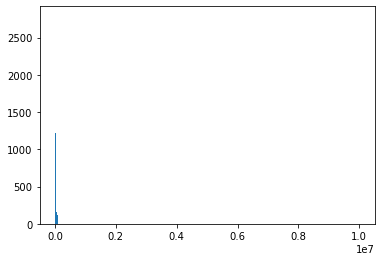

In [57]:
plt.hist(jobs['Salary'], bins='auto')
plt.show()
#From the plot below, it appears as though there are some outlying salary figures, at over 7 figures salary a year. I will investigate further

In [58]:
jobs.loc[jobs['Salary'] > 1000000]

,Id,Title,Location,Company,ContractType,ContractTime,Category,Salary,OpenDate,CloseDate,Source,Experience/Seniority,OpeningDuration
26971,69181134,Office Technical Administrator,Cheshire,Group Cytek,full_time,permanent,Engineering Jobs,10000000.0,2013-03-25 12:00:00,2013-04-24 12:00:00,workthing.com,Associate,30 days 00:00:00.000000000
48506,71869302,New Business Development Exec/Manager,Central London,PERISCOPE UK LTD,full_time,permanent,Teaching Jobs,10000000.0,2013-11-22 12:00:00,2014-02-20 12:00:00,jobs.guardian.co.uk,Senior/Manager,90 days 00:00:00.000000000


In [59]:
jobs.loc[jobs['Salary'] > 1000000, 'Salary']=0
#remove the erroneous salary values, set to zero such that they are excluded from LM analysis

In [60]:
jobs_reg = jobs[jobs['Salary'] > 1000]
#I have decided to remove the '0' salary values given, because they do not reflect reality
#(Nobody will apply for a job that does not pay any salary) and will unnecessarily skew the linear model.

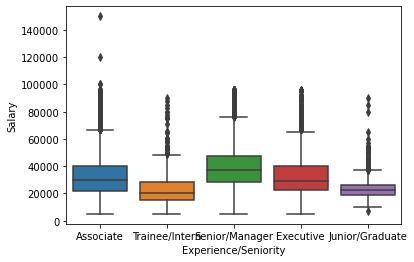

In [61]:
sns.boxplot(y='Salary',x='Experience/Seniority',data=jobs_reg)
#many upward salary outliers, likely reflective of the sample size. I have elected not to remove these outliers,
#as I don't believe they are the result of poor data or data errors.

In [62]:
jobs_reg[((jobs_reg['Salary'] > 80000) & (jobs_reg['ContractType'].str.contains('part')))]
#I have decided not to remove the outliers in the below table, and the above boxplot following removal of the two outlier values

,Id,Title,Location,Company,ContractType,ContractTime,Category,Salary,OpenDate,CloseDate,Source,Experience/Seniority,OpeningDuration
12813,68242241,Finance Director Part Time,Kent,Goldhawk Associates,part_time,permanent,Accounting & Finance Jobs,90000.0,2012-12-22 15:00:00,2013-02-20 15:00:00,GAAPweb,Executive,60 days 00:00:00.000000000
15558,68510934,Prif Swyddog Cyllid / Chief Finance Officer,Bridgend,Not Listed,part_time,permanent,Accounting & Finance Jobs,81505.0,2013-02-04 12:00:00,2013-04-05 12:00:00,fish4.co.uk,Associate,60 days 00:00:00.000000000
34192,69995303,"IT consultant (admin, design, programming)",UK,Contractor Club,part_time,permanent,Accounting & Finance Jobs,96000.0,2013-09-28 15:00:00,2013-10-28 15:00:00,totaljobs.com,Associate,30 days 00:00:00.000000000


In [63]:
X = jobs_reg[['Category', 'ContractType', 'Experience/Seniority']]
#repeat for other combinations of predictor variables

In [64]:
X = pd.get_dummies(data=X, drop_first=True)
X.head()
#categorical variables require dummy values for ease of linear model fitting.

,Category_Engineering Jobs,Category_Healthcare & Nursing Jobs,Category_Hospitality & Catering Jobs,Category_IT Jobs,"Category_PR, Advertising & Marketing Jobs",Category_Sales Jobs,Category_Teaching Jobs,ContractType_flexible,ContractType_full_time,ContractType_part_time,Experience/Seniority_Executive,Experience/Seniority_Junior/Graduate,Experience/Seniority_Senior/Manager,Experience/Seniority_Trainee/Intern
0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
1,1,0,0,0,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,1,0,0,0,0,0
3,1,0,0,0,0,0,0,0,1,0,0,0,0,0
4,1,0,0,0,0,0,0,0,1,0,0,0,0,0


In [65]:
Y = jobs_reg['Salary']
#dependent variable obviously to be Salary

In [66]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=101)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(31431, 14)
(20955, 14)
(31431,)
(20955,)


In [67]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [68]:
predictions = model.predict(X_test)
predictions
#Hooray, predictions for salary below

array([32431.85339447, 29177.40050928, 20486.46727422, ...,
       32431.85339447, 36137.30388479, 26749.52106663])

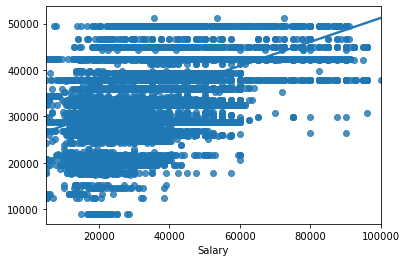

In [69]:
sns.regplot(y_test,predictions)
#particularly nebulous cluster shows linear regression will be poor way to fill missing Salary values

In [70]:
import statsmodels.api as sm
X_train_Sm= sm.add_constant(X_train)
X_train_Sm= sm.add_constant(X_train)
ls=sm.OLS(y_train,X_train_Sm).fit()
print(ls.summary())

#LM regression results below; particularly unreliable. Further notes to follow in next box

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.257
Model:                            OLS   Adj. R-squared:                  0.257
Method:                 Least Squares   F-statistic:                     775.8
Date:                Mon, 23 Nov 2020   Prob (F-statistic):               0.00
Time:                        17:12:57   Log-Likelihood:            -3.4397e+05
No. Observations:               31431   AIC:                         6.880e+05
Df Residuals:                   31416   BIC:                         6.881e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                                coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------

In [71]:
#repeating the above for varying column combinations as predictor variables 
#yields LMs with low predictave quality (R squared < 30%). LM as imputation method abandoned
#I have decided after re-running for several combinations of predictor variables 
#to reject LM prediction as an imputation, and imputation in general,
#as I both believe the NaN value is instructive, insofar as while retaining the required float datatype
#I am able to obtain meaning from salary being omitted, i.e. it will be disclosed/negotiated upon successful application
#and further, the data is scattered quite randomly. On these grounds I reject imputing the missing Salary Data

In [72]:
jobs['OpenDate'] = jobs['OpenDate'].dt.strftime("%Y%m%dT%H%M%S")
jobs['CloseDate'] = jobs['CloseDate'].dt.strftime("%Y%m%dT%H%M%S")

In [73]:
jobs.head(5)

,Id,Title,Location,Company,ContractType,ContractTime,Category,Salary,OpenDate,CloseDate,Source,Experience/Seniority,OpeningDuration
0,12612628,Engineering Systems Analyst,Dorking,Gregory Martin International,full_time,permanent,Engineering Jobs,25000.0,20130708T120000,20130906T120000,cv-library.co.uk,Associate,60 days 00:00:00.000000000
1,12612830,Stress Engineer Glasgow,Glasgow,Gregory Martin International,full_time,permanent,Engineering Jobs,30000.0,20120130T000000,20120330T000000,cv-library.co.uk,Associate,60 days 00:00:00.000000000
2,12612844,Modelling and simulation analyst,Hampshire,Gregory Martin International,full_time,permanent,Engineering Jobs,30000.0,20121221T150000,20130120T150000,cv-library.co.uk,Associate,30 days 00:00:00.000000000
3,12613049,Engineering Systems Analyst / Mathematical Mod...,Surrey,Gregory Martin International,full_time,permanent,Engineering Jobs,27500.0,20131208T150000,20140206T150000,cv-library.co.uk,Associate,60 days 00:00:00.000000000
4,12613647,"Pioneer, Miser Engineering Systems Analyst",Surrey,Gregory Martin International,full_time,permanent,Engineering Jobs,25000.0,20130302T120000,20130501T120000,cv-library.co.uk,Associate,60 days 00:00:00.000000000


In [74]:
jobs['Title'] = jobs['Title'].astype(str)
jobs['Location'] = jobs['Location'].astype(str)
jobs['Company'] = jobs['Company'].astype(str)
jobs['ContractType'] = jobs['ContractType'].astype(str)
jobs['ContractTime'] = jobs['ContractTime'].astype(str)
jobs['Category'] = jobs['Category'].astype(str)
jobs['Source'] = jobs['Source'].astype(str)

In [75]:
jobs = jobs.drop(['Experience/Seniority', 'OpeningDuration'], axis = 1)

In [76]:
jobs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55169 entries, 0 to 24870
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            55169 non-null  int64  
 1   Title         55169 non-null  object 
 2   Location      55169 non-null  object 
 3   Company       55169 non-null  object 
 4   ContractType  55169 non-null  object 
 5   ContractTime  55169 non-null  object 
 6   Category      55169 non-null  object 
 7   Salary        55169 non-null  float64
 8   OpenDate      55169 non-null  object 
 9   CloseDate     55169 non-null  object 
 10  Source        55169 non-null  object 
dtypes: float64(1), int64(1), object(9)
memory usage: 5.1+ MB


......

## Saving data
Save the cleaned data

In [77]:
# code to save output data
jobs.to_csv('dataset1_solution.csv',index=False)

## Summary
Give a short summary and anything you would like to talk about assessment 2 part 1 here.

In [80]:
#Report to follow